In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/MyDrive/TACAI pictures')

import cv2
import glob as gl
import random
import matplotlib.pyplot as plt


In [ ]:
#get images paths

base_path = '/content/drive/MyDrive/TACAI pictures'
images = []

for i in range(4):
  images.append(gl.glob(base_path + '/*/*.jpg'))

print(images)

[['/content/drive/MyDrive/TACAI pictures/1/7.jpg', '/content/drive/MyDrive/TACAI pictures/1/6.jpg', '/content/drive/MyDrive/TACAI pictures/1/5.jpg', '/content/drive/MyDrive/TACAI pictures/1/4.jpg', '/content/drive/MyDrive/TACAI pictures/1/3.jpg', '/content/drive/MyDrive/TACAI pictures/1/2.jpg', '/content/drive/MyDrive/TACAI pictures/1/1.jpg', '/content/drive/MyDrive/TACAI pictures/1/0.jpg', '/content/drive/MyDrive/TACAI pictures/1/9.jpg', '/content/drive/MyDrive/TACAI pictures/1/8.jpg', '/content/drive/MyDrive/TACAI pictures/0/9.jpg', '/content/drive/MyDrive/TACAI pictures/0/8.jpg', '/content/drive/MyDrive/TACAI pictures/0/7.jpg', '/content/drive/MyDrive/TACAI pictures/0/5.jpg', '/content/drive/MyDrive/TACAI pictures/0/6.jpg', '/content/drive/MyDrive/TACAI pictures/0/4.jpg', '/content/drive/MyDrive/TACAI pictures/0/3.jpg', '/content/drive/MyDrive/TACAI pictures/0/2.jpg', '/content/drive/MyDrive/TACAI pictures/0/1.jpg', '/content/drive/MyDrive/TACAI pictures/0/0.jpg', '/content/drive/My

In [ ]:
#pentru a avea toti randomlist la fel random.seed
random.seed(42)
randomlist = random.sample(range(0, 9), 7) 

train_images = []
test_images  = []

for idx in range(4):
  tmp_train = []
  tmp_test  = []
  for i in range(10):
      if i in randomlist:
        tmp_train.append(images[idx][i])
      else:
        tmp_test.append(images[idx][i])
  train_images.append(tmp_train)
  test_images.append(tmp_test)

print(randomlist)
print(train_images)
print(test_images)





[1, 0, 5, 2, 8, 4, 7]
[['/content/drive/MyDrive/TACAI pictures/1/7.jpg', '/content/drive/MyDrive/TACAI pictures/1/6.jpg', '/content/drive/MyDrive/TACAI pictures/1/5.jpg', '/content/drive/MyDrive/TACAI pictures/1/3.jpg', '/content/drive/MyDrive/TACAI pictures/1/2.jpg', '/content/drive/MyDrive/TACAI pictures/1/0.jpg', '/content/drive/MyDrive/TACAI pictures/1/9.jpg'], ['/content/drive/MyDrive/TACAI pictures/1/7.jpg', '/content/drive/MyDrive/TACAI pictures/1/6.jpg', '/content/drive/MyDrive/TACAI pictures/1/5.jpg', '/content/drive/MyDrive/TACAI pictures/1/3.jpg', '/content/drive/MyDrive/TACAI pictures/1/2.jpg', '/content/drive/MyDrive/TACAI pictures/1/0.jpg', '/content/drive/MyDrive/TACAI pictures/1/9.jpg'], ['/content/drive/MyDrive/TACAI pictures/1/7.jpg', '/content/drive/MyDrive/TACAI pictures/1/6.jpg', '/content/drive/MyDrive/TACAI pictures/1/5.jpg', '/content/drive/MyDrive/TACAI pictures/1/3.jpg', '/content/drive/MyDrive/TACAI pictures/1/2.jpg', '/content/drive/MyDrive/TACAI pictures/1/

In [ ]:
tr_im = []
ts_im = []

for i in range(len(train_images)):
    tmp = []
    for j in range(len(train_images[0])):
        im = cv2.imread(train_images[i][j])
        tmp.append(im)
    tr_im.append(tmp)

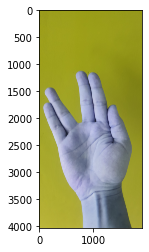

In [ ]:
plt.imshow(tr_im[0][0])
plt.show()

#openCV citeste imaginile BGR


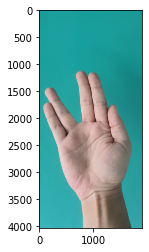

In [ ]:
# convert images to RGB

for i in range(len(tr_im)):
    for j in range(len(tr_im[0])):
        tr_im[i][j] = cv2.cvtColor(tr_im[i][j], cv2.COLOR_BGR2RGB)

plt.imshow(tr_im[0][0])
plt.show()

#problema la dimensiune nu este optim 

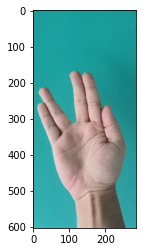

In [ ]:
#rezise in jos 

scale_percent = 0.15 # percent of original size
width = int(tr_im[0][0].shape[1] * scale_percent )
height = int(tr_im[0][0].shape[0] * scale_percent )
dim = (width, height)

for i in range(len(tr_im)):
    for j in range(len(tr_im[0])):
        tr_im[i][j] = cv2.resize(tr_im[i][j], dim)


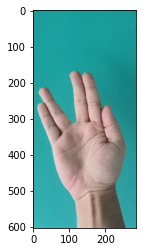

In [ ]:
plt.imshow(tr_im[0][0])
plt.show()


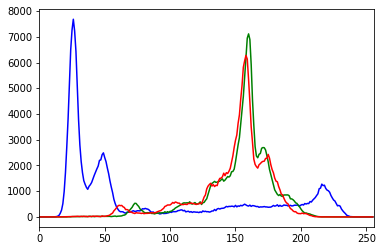

In [ ]:
#histogram preg 150
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([tr_im[0][0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

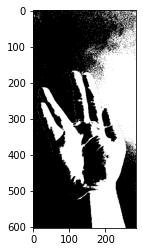

In [ ]:
# canalul RGB 
# [:,:,0] R [:,:,1] G [:,:,2] B

tst_tmp = tr_im[0][0][:,:,2].copy()

tst_tmp[tst_tmp > 150] = 0
tst_tmp[tst_tmp > 0]   = 255

plt.imshow(tst_tmp, cmap= 'gray')
plt.show()


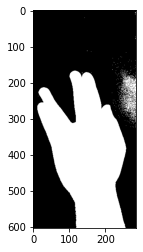

In [ ]:
# 46 163 157 culoarea pielii RGB
tst_tmp =  tr_im[0][0].copy()

width = int(tst_tmp.shape[1])
height = int(tst_tmp.shape[0])

for i in range(height):
    for j in range(width):
        if tst_tmp[i][j][0] in range(16, 77) and tst_tmp[i][j][1] in range(133, 204) and tst_tmp[i][j][2] in range(111, 205):
            tst_tmp[i,j,:] = [0,0,0]
        else:
            tst_tmp[i,j,:] = [255,255,255]

plt.imshow(tst_tmp, cmap= 'gray')
plt.show()